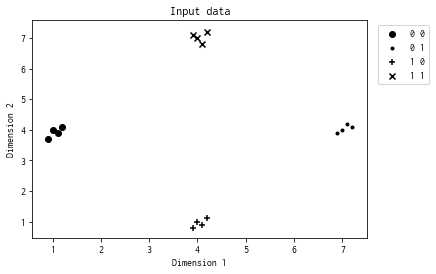

In [1]:
# p.330 14-3 単層ニューラルネット
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl
%matplotlib inline

text = np.loadtxt('data_simple_nn.txt')

data = text[:, 0:2]
labels = text[:, 2:]

def plot4(data, labels):
    plt.figure()
    ind = labels[:, 0] * 2 + labels[:, 1]
    plots = []
    
    for i, m in enumerate(('o', '.', '+', 'x')):
        p = plt.scatter(data[ind==i, 0], data[ind==i, 1], marker=m, c='black')
        plots.append(p)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Input data')
    plt.legend(plots, ['0 0', '0 1', '1 0', '1 1'], bbox_to_anchor=(1.2, 1))
    plt.show()
    
plot4(data, labels)

Epoch: 20; Error: 0.14219058705835907;
Epoch: 40; Error: 0.07666128288459428;
Epoch: 60; Error: 0.06005822085383285;
Epoch: 80; Error: 0.053877862429320814;
Epoch: 100; Error: 0.045742469891942;
The maximum number of train epochs is reached


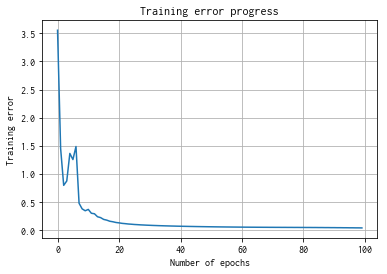

In [2]:
dim1_min, dim1_max = data[:, 0].min(), data[:, 0].max()
dim2_min, dim2_max = data[:, 1].min(), data[:, 1].max()

dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
num_output = 2

#nn = nl.net.newp([dim1, dim2], num_output)
nn = nl.net.newff([dim1, dim2], [8, num_output])
nn.trainf = nl.train.train_gd
error_progress = nn.train(data,labels, epochs = 100, show = 20, lr = 0.03)

plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()
plt.show()

In [3]:
print('\nTest results:')
data_test = [[0.4, 4.3], [4.4, 0.6], [4.7, 8.1]]
for item in data_test:
    print(item, '-->', nn.sim([item])[0])


Test results:
[0.4, 4.3] --> [ 0.51110576 -0.16516429]
[4.4, 0.6] --> [0.94900895 0.05820795]
[4.7, 8.1] --> [0.93638942 0.94786989]


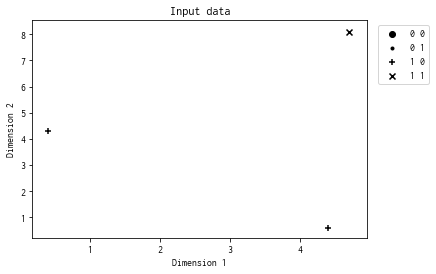

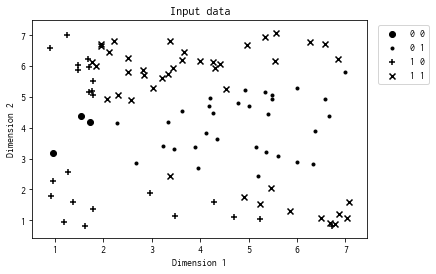

In [4]:
xy = np.array(data_test)
out = np.where(nn.sim(xy) < 0.5, 0, 1)
plot4(xy, out)

x = np.random.rand(100) * (dim1_max - dim1_min) + dim1_min
y = np.random.rand(100) * (dim2_max - dim2_min) + dim2_min
xy = np.hstack([x.reshape(-1, 1), y.reshape(-1, 1)])
out = np.where(nn.sim(xy) < 0.5, 0, 1)
plot4(xy, out)